8

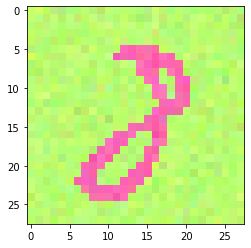

In [115]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split

#Load the dataset
train_data = np.load('datasets/cmnist/fgbg_cmnist_cpr0.5-0.5/train_x.npy')
train_labels = np.load('datasets/cmnist/fgbg_cmnist_cpr0.5-0.5/train_y.npy')
test_data = np.load('datasets/cmnist/fgbg_cmnist_cpr0.5-0.5/test_x.npy')
test_labels = np.load('datasets/cmnist/fgbg_cmnist_cpr0.5-0.5/test_y.npy')

#change labels to ints
train_labels=train_labels.astype(int)
test_labels=test_labels.astype(int)

#resize the images to correct shape
test_data = test_data.transpose(0,2,3,1)
train_data = train_data.transpose(0,2,3,1)

#data is already normalized to 0-1, no need to do it

#plot example
plt.imshow(train_data[17598])
train_labels[17598]

Training set (images) shape: (60000, 28, 28, 3)
Test set (images) shape: (10000, 28, 28, 3)


Text(0.5, 1.0, '(Label: 0)')

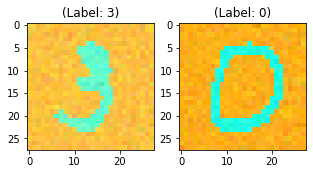

In [116]:
print("Training set (images) shape: {shape}".format(shape=train_data.shape))
print("Test set (images) shape: {shape}".format(shape=test_data.shape))
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img =train_data[10]
curr_lbl = train_labels[10]
plt.imshow(curr_img)
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = test_data[10]
curr_lbl = test_labels[10]
plt.imshow(curr_img)
plt.title("(Label: " + str(curr_lbl) + ")")

In [117]:
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)

In [120]:
batch_size = 128
epochs = 30
inChannel = 1
x, y = 28, 28
num_classes = 10

In [121]:
def gen_autoencoder():
    autoencoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        
        #here comes the decoder
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(7*7*128, activation='relu'),
        tf.keras.layers.Reshape((7,7,128)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2,2)),
        tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='same'),
    ])
    autoencoder.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.RMSprop())
    return autoencoder

In [122]:
autoencoder= gen_autoencoder()
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 99s 2ms/sample - loss: 0.2271 - val_loss: 0.0264
Epoch 2/30
13696/48000 [=======>......................] - ETA: 1:07 - loss: 0.0259